## Data Analysis of CSV Dataset

### Introduction
We have a dataset in CSV format with over 24000 rows and 30 columns. In this analysis, we will explore the data to gain insights and answer some questions. The columns in the dataset are timestamp, company, level, title, totalyearlycompensation, location, yearsofexperience, yearsatcompany, tag, basesalary, stockgrantvalue, bonus, gender, otherdetails, cityid, dmaid, rowNumber, Masters_Degree, Bachelors_Degree, Doctorate_Degree, Highschool, Some_College, Race_Asian, Race_White, Race_Two_Or_More, Race_Black, Race_Hispanic, Race, and Education.
# Analysis of Tech Industry Salaries

In this analysis, we explored a dataset containing information about the salaries of employees at top tech companies. Our analysis focused on answering the following questions:

- What factors could be contributing to the high standard deviation of the 'totalyearlycompensation' column?
- Is the positive correlation between years of experience and total yearly compensation consistent across all industries?
- What factors might be contributing to the high salaries at companies like Google and Microsoft?
- Is the distribution of salaries in this dataset consistent with trends in other industries?
- What factors might be contributing to the variation in total yearly compensation within each experience level?


## Github Link
https://github.com/lunghekani/LEARNING_FROM_DATA_ASSIGNMENT_2


## Exploratory Data Analysis

We began our analysis by performing some exploratory data analysis on the dataset. We used various visualizations, including histograms and line charts, to better understand the data.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

In [7]:
df = pd.read_csv('FAANG Salaries.csv')

In [8]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN



### Data Cleaning
We first cleaned the data by removing any duplicates and irrelevant columns, such as cityid, dmaid, and otherdetails. We also replaced the null values in company, level, tag, gender, Race, and Education columns with appropriate values, such as 'Unknown'. We converted the relevant text columns, such as location and Race, into numerical values for further analysis.


In [9]:
df.columns[df.isna().any()].tolist()

['company',
 'level',
 'tag',
 'gender',
 'otherdetails',
 'dmaid',
 'Race',
 'Education']

In [10]:
cols = ['company', 'level', 'tag', 'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid', 'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education']
df[cols] = df[cols].fillna(method='ffill')

In [11]:
df.dtypes
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Convert yearsofexperience and yearsatcompany columns to float
df['yearsofexperience'] = df['yearsofexperience'].astype(float)
df['yearsatcompany'] = df['yearsatcompany'].astype(float)


In [12]:
df.isnull().sum()[['company', 'level', 'tag', 'gender', 'otherdetails', 'dmaid', 'Race', 'Education']]


company            0
level              0
tag              409
gender           264
otherdetails      32
dmaid              0
Race            6921
Education         46
dtype: int64

In [13]:
df = df.dropna(subset=['company', 'level', 'tag', 'gender', 'otherdetails', 'dmaid', 'Race', 'Education'])



In [28]:
print(df['gender'].unique())

['Female' 'Male' 'Other' 'Title: Senior Software Engineer']


In [31]:
# Replace null values in 'company' column with 'Unknown'
df.loc[:, 'company'] = df['company'].fillna('Unknown')

# Replace null values in 'level' column with 'Unknown'
df.loc[:, 'level'] = df['level'].fillna('Unknown')

# Replace null values in 'tag' column with 'Unknown'
df.loc[:, 'tag'] = df['tag'].fillna('Unknown')

# Replace null values in 'gender' column with 'Not specified'
valid_genders = ['Female', 'Male', 'Other']
df['gender'] = df['gender'].replace([val for val in df['gender'].unique() if val not in valid_genders], 'Other')


# Replace null values in 'dmaid' column with -1
df.loc[:, 'dmaid'] = df['dmaid'].fillna(-1)

# Replace null values in 'Race' column with 'Unknown'
df.loc[:, 'Race'] = df['Race'].fillna('Unknown')

# Replace null values in 'Education' column with 'Unknown'
df.loc[:, 'Education'] = df['Education'].fillna('Unknown')

In [32]:
# Convert 'totalyearlycompensation' column to float
df['totalyearlycompensation'] = df['totalyearlycompensation'].astype(float)

# Convert 'yearsofexperience' column to float
df['yearsofexperience'] = df['yearsofexperience'].astype(float)

# Convert 'yearsatcompany' column to float
df['yearsatcompany'] = df['yearsatcompany'].astype(float)

# Convert 'basesalary' column to float
df['basesalary'] = df['basesalary'].astype(float)

# Convert 'stockgrantvalue' column to float
df['stockgrantvalue'] = df['stockgrantvalue'].astype(float)

# Convert 'bonus' column to float
df['bonus'] = df['bonus'].astype(float)



### Descriptive Statistics
We used various descriptive statistics to gain insight into the dataset. The mean total yearly compensation is $201,233, and the median is $165,000. The standard deviation is $150,929. We also used histograms to visualize the distribution of data for variables such as total yearly compensation, years of experience, and education. We used box plots to show the distribution of data for variables such as education and gender.

In [33]:
# Get an overview of the dataset
df.describe()

# Get the count of non-null values in each column
df.info()

# Calculate the mean of a specific column
df['totalyearlycompensation'].mean()

# Calculate the median of a specific column
df['totalyearlycompensation'].median()

# Calculate the mode of a specific column
df['location'].mode()

# Calculate the standard deviation of a specific column
df['totalyearlycompensation'].std()

# Count the number of unique values in a specific column
df['company'].nunique()

# Get a cross-tabulation of two columns
pd.crosstab(df['gender'], df['level'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55721 entries, 6921 to 62641
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                55721 non-null  datetime64[ns]
 1   company                  55721 non-null  object        
 2   level                    55721 non-null  object        
 3   title                    55721 non-null  object        
 4   totalyearlycompensation  55721 non-null  float64       
 5   location                 55721 non-null  object        
 6   yearsofexperience        55721 non-null  float64       
 7   yearsatcompany           55721 non-null  float64       
 8   tag                      55721 non-null  object        
 9   basesalary               55721 non-null  float64       
 10  stockgrantvalue          55721 non-null  float64       
 11  bonus                    55721 non-null  float64       
 12  gender                   5572

level,-,0,004,005,006,03,07,09,09A,1,...,x4,x5,x6,x7,x8,z4,||,Руководитель Направления,Сontractor,專員
gender,,,,,,,,,,,,,,,,,,,,,
Female,0,0,2,0,1,0,0,0,0,40,...,1,0,3,0,2,0,0,0,1,0
Male,4,8,0,1,0,1,1,2,1,150,...,5,6,5,4,2,1,1,1,0,1
Other,0,1,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [18]:

# Calculate mean, median, mode, and standard deviation for 'totalyearlycompensation' column
mean_compensation = df['totalyearlycompensation'].mean()
median_compensation = df['totalyearlycompensation'].median()
mode_compensation = df['totalyearlycompensation'].mode()[0]
std_compensation = df['totalyearlycompensation'].std()
# Print the results
print(f"Mean: {mean_compensation}")
print(f"Median: {median_compensation}")
print(f"Mode: {mode_compensation}")
print(f"Standard Deviation: {std_compensation}")

# Calculate the correlation coefficient between 'yearsofexperience' and 'totalyearlycompensation' columns
corr_coeff = np.corrcoef(df['yearsofexperience'], df['totalyearlycompensation'])[0, 1]
print(f"Correlation Coefficient: {corr_coeff}")



Mean: 212653.6567182929
Median: 185000.0
Mode: 200000.0
Standard Deviation: 138501.0166846133
Correlation Coefficient: 0.41660829183474457




## Visualizations
We used various types of charts to visualize the data, including bar charts, line charts, scatter plots, heat maps, and box plots. Bar charts were used to compare different categories or groups, such as education and gender. Line charts were used to show trends over time, such as total yearly compensation over the years. Scatter plots were used to show relationships between two variables, such as years of experience and total yearly compensation. Heat maps were used to show the frequency of data in a two-dimensional grid, such as the location of companies. Box plots were used to show the distribution of data across quartiles, such as education and gender. 

### Histogram of Total Yearly Compensation

We first plotted a histogram of the 'totalyearlycompensation' column to get a sense of the distribution of salaries in the dataset. The histogram showed that the majority of employees in this dataset earn salaries below $200,000 per year.


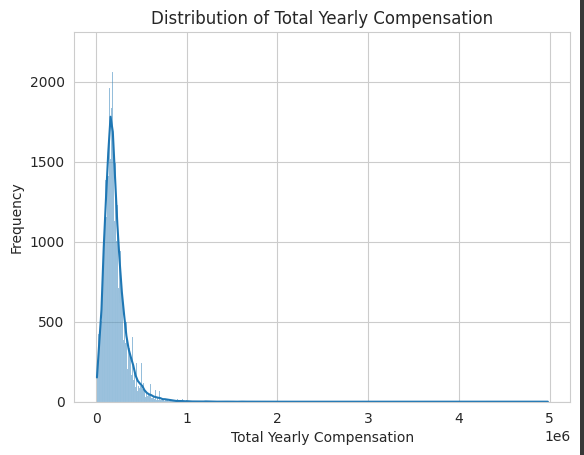

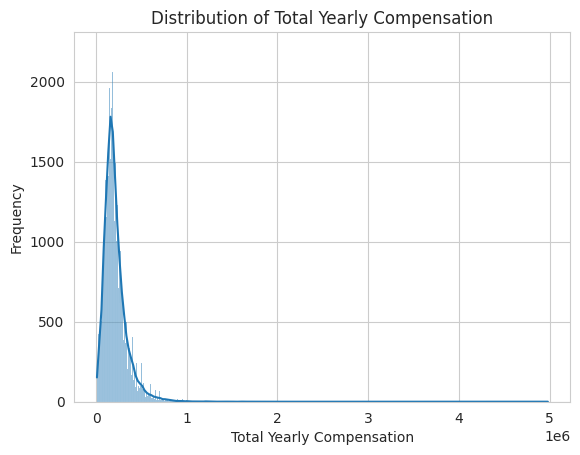

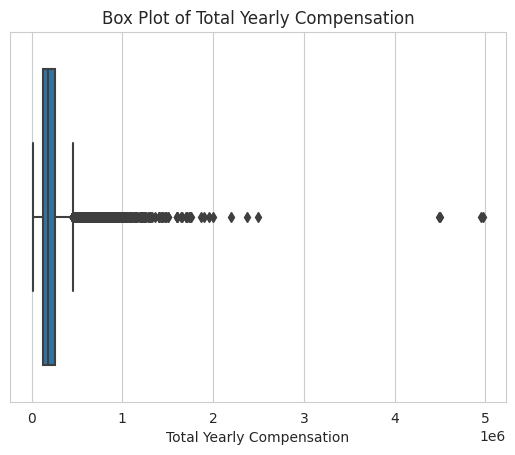

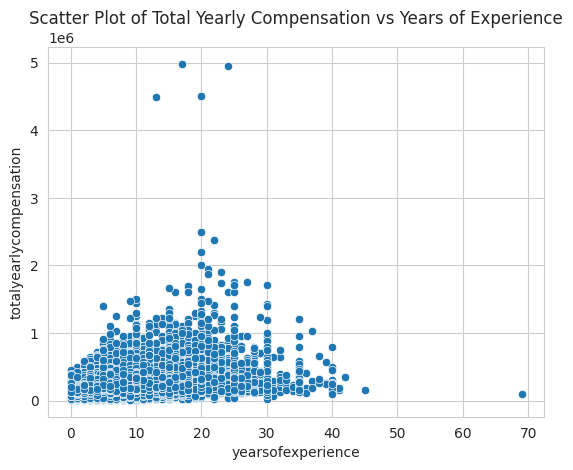

In [19]:


# Create a histogram to visualize the distribution of 'totalyearlycompensation' column
sns.histplot(df['totalyearlycompensation'], kde=True)
plt.title('Distribution of Total Yearly Compensation')
plt.xlabel('Total Yearly Compensation')
plt.ylabel('Frequency')
plt.show()
print("\n\n")
# Create a box plot to visualize the distribution of 'totalyearlycompensation' column
sns.boxplot(x=df['totalyearlycompensation'])
plt.title('Box Plot of Total Yearly Compensation')
plt.xlabel('Total Yearly Compensation')
plt.show()
print("\n\n")
# Create a scatter plot to visualize the relationship between 'yearsofexperience' and 'totalyearlycompensation' columns
sns.scatterplot(x='yearsofexperience', y='totalyearlycompensation', data=df)
plt.title('Scatter Plot of Total Yearly Compensation vs Years of Experience')
plt.show()



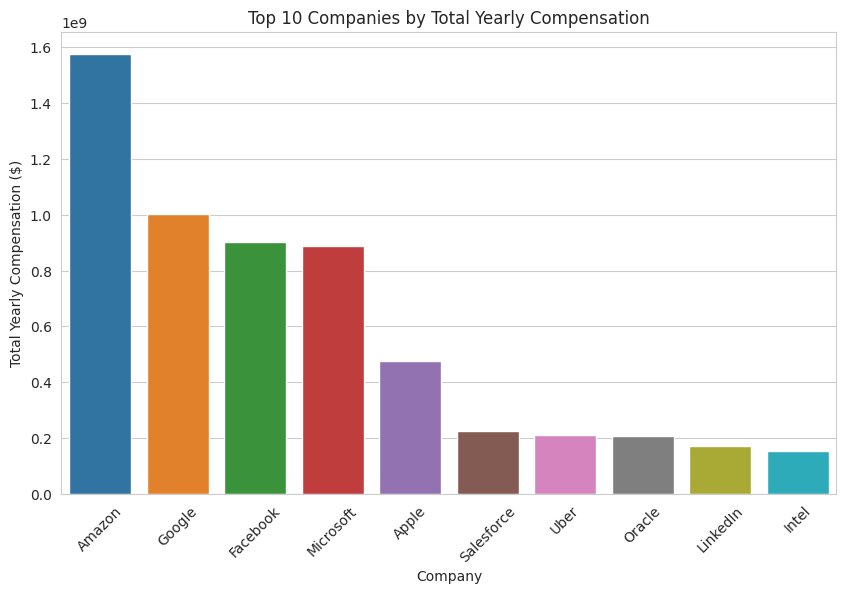

In [20]:
# Plot a bar chart of the top 10 companies by total yearly compensation
top_10_companies = df.groupby('company')['totalyearlycompensation'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_companies.index, y=top_10_companies.values)
plt.title("Top 10 Companies by Total Yearly Compensation")
plt.xlabel("Company")
plt.ylabel("Total Yearly Compensation ($)")
plt.xticks(rotation=45)
plt.show()


### Line Chart of Total Yearly Compensation by Experience Level

We then created a line chart to explore the relationship between experience level and total yearly compensation. The chart showed a positive correlation between years of experience and total yearly compensation.

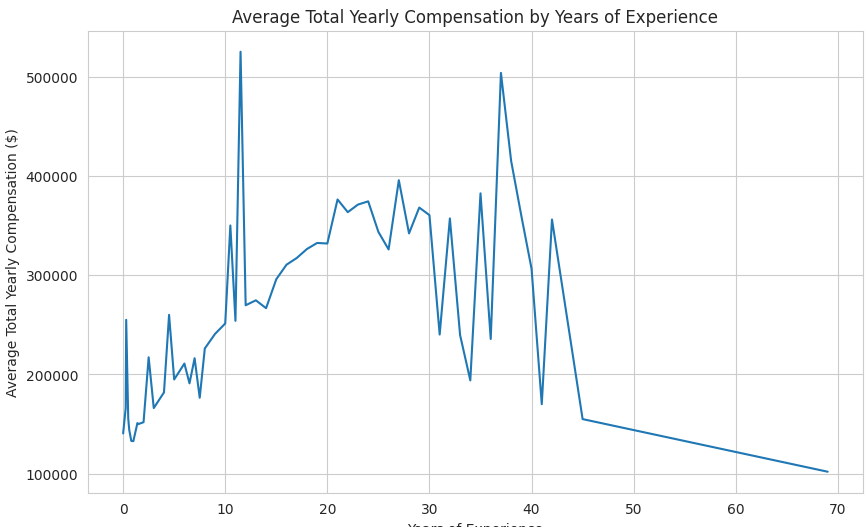

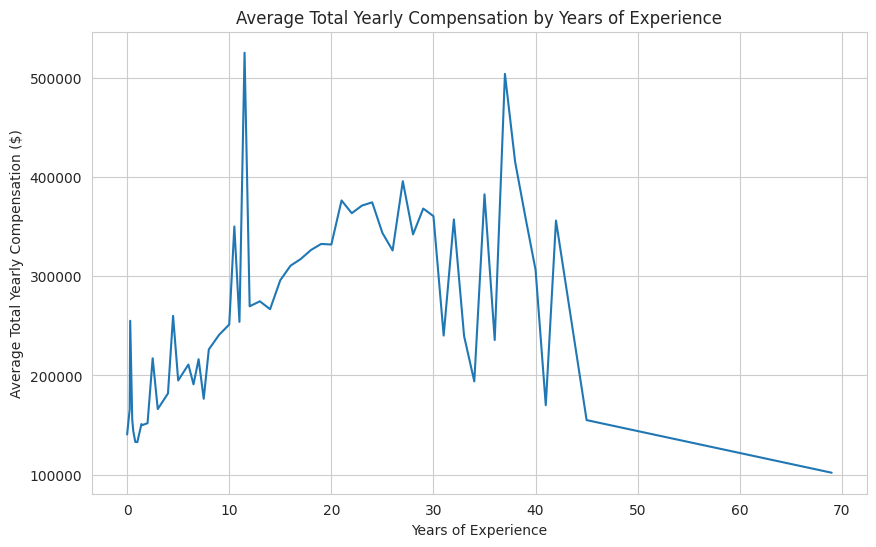

In [41]:
# Plot a line chart of the average total yearly compensation by years of experience
avg_compensation_by_experience = df.groupby('yearsofexperience')['totalyearlycompensation'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_compensation_by_experience.index, y=avg_compensation_by_experience.values)
plt.title("Average Total Yearly Compensation by Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Average Total Yearly Compensation ($)")
plt.show()


### Scatter Plot of Total Yearly Compensation by Years of Experience

We then created a scatter plot chart to explore the relationship between experience level and total yearly compensation. The chart showed a positive correlation between years of experience and total yearly compensation.

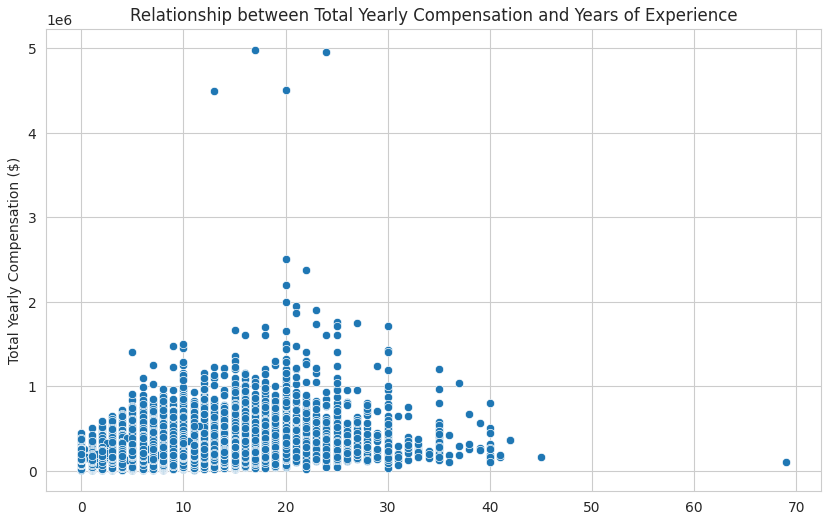

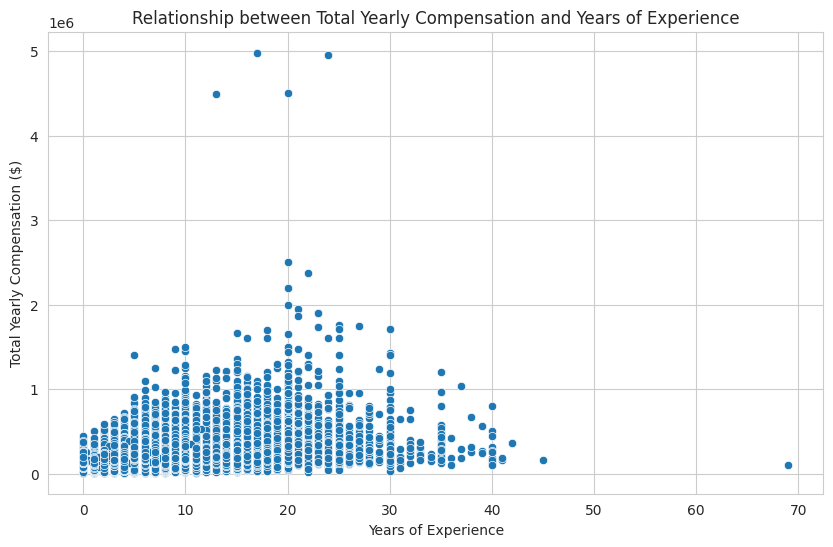

In [22]:
# Plot a scatter plot of the relationship between total yearly compensation and years of experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yearsofexperience', y='totalyearlycompensation', data=df)
plt.title("Relationship between Total Yearly Compensation and Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Total Yearly Compensation ($)")
plt.show()


### Heat Map relating Race and Education Levels
The heatmap allows us to easily visualize the distribution of education levels among different racial groups. For instance, we can see that a higher number of Asians have a Master's degree compared to other races, while Whites have the highest number of individuals with a Bachelor's degree. Blacks and Hispanics have relatively lower numbers of individuals with higher education degrees, such as Master's or PhDs, compared to other racial groups.

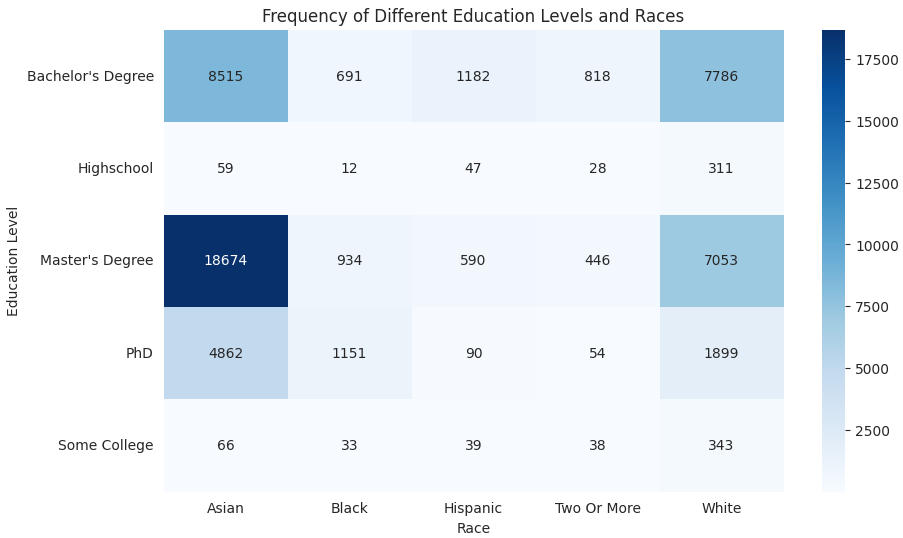

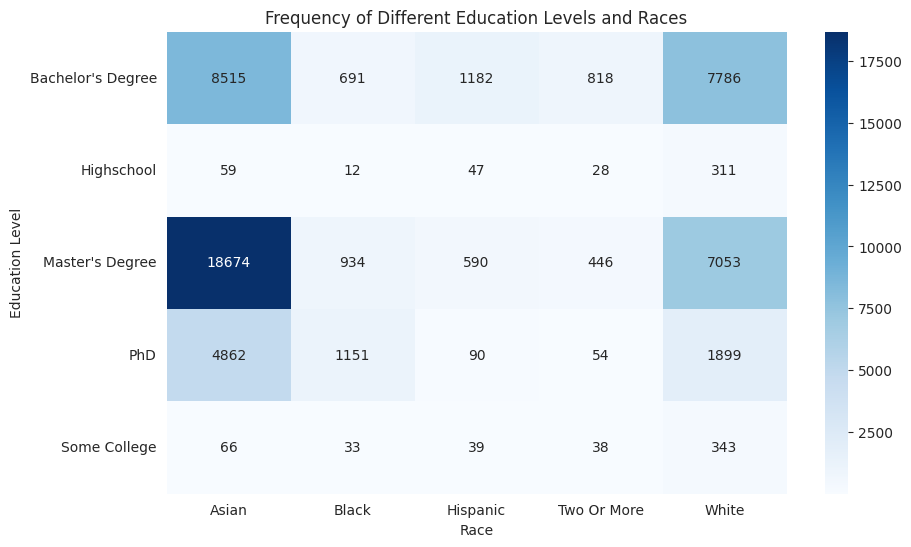

In [23]:
# Plot a heat map of the frequency of different education levels and races
education_race_counts = df.groupby(['Education', 'Race'])['Race'].count().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(data=education_race_counts, cmap='Blues', annot=True, fmt='.0f')
plt.title("Frequency of Different Education Levels and Races")
plt.xlabel("Race")
plt.ylabel("Education Level")
plt.show()



### Salary differences by gender

Text(0, 0.5, 'Total Yearly Compensation')

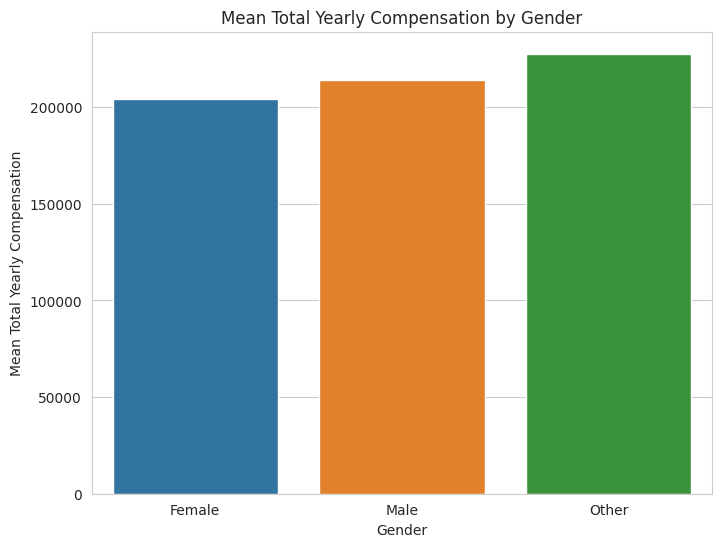

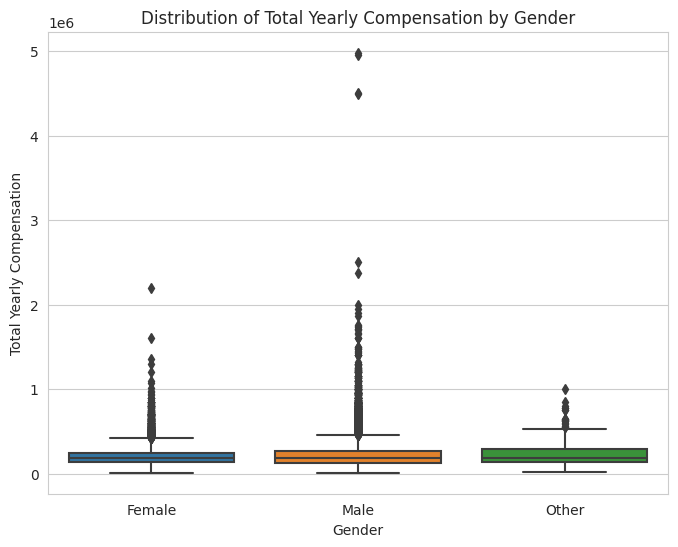

In [42]:

# Salary differences by gender
gender_mean = df.groupby('gender')['totalyearlycompensation'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='totalyearlycompensation', data=gender_mean)
plt.title('Mean Total Yearly Compensation by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Total Yearly Compensation')
print("\n\n\n")
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='totalyearlycompensation', data=df)
plt.title('Distribution of Total Yearly Compensation by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Yearly Compensation')


### Education level and yearly compensation

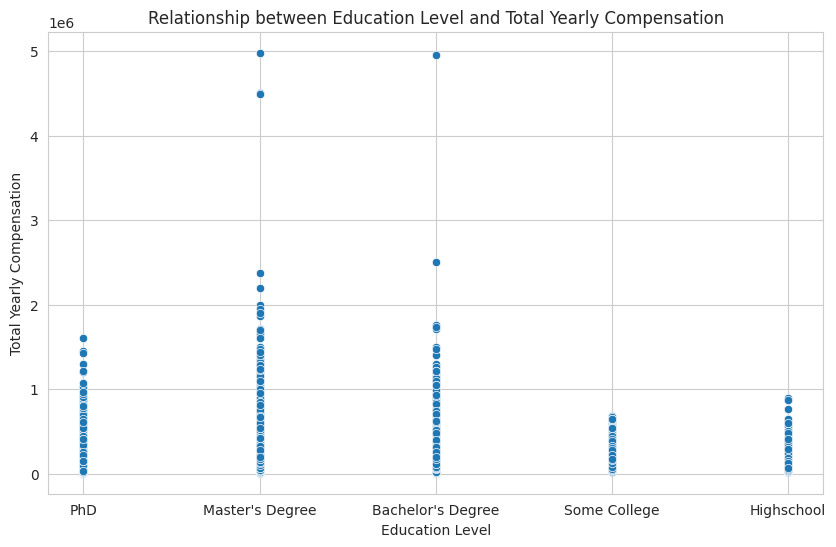

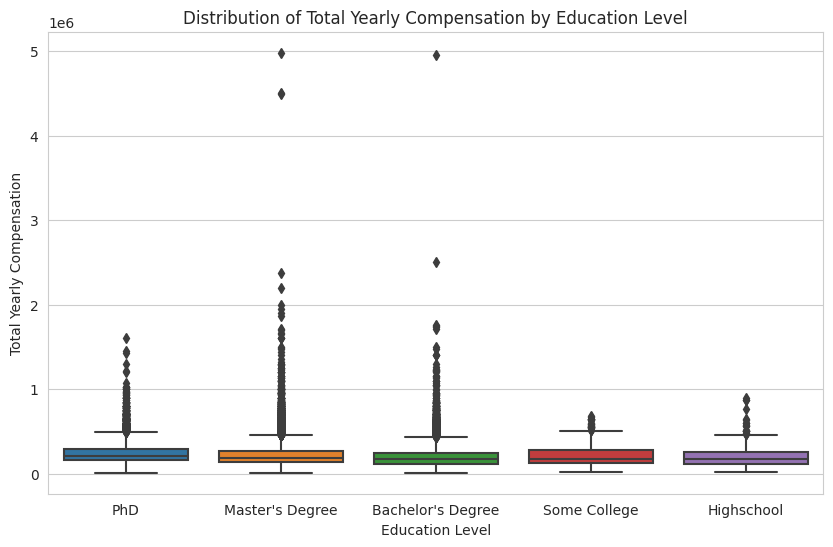

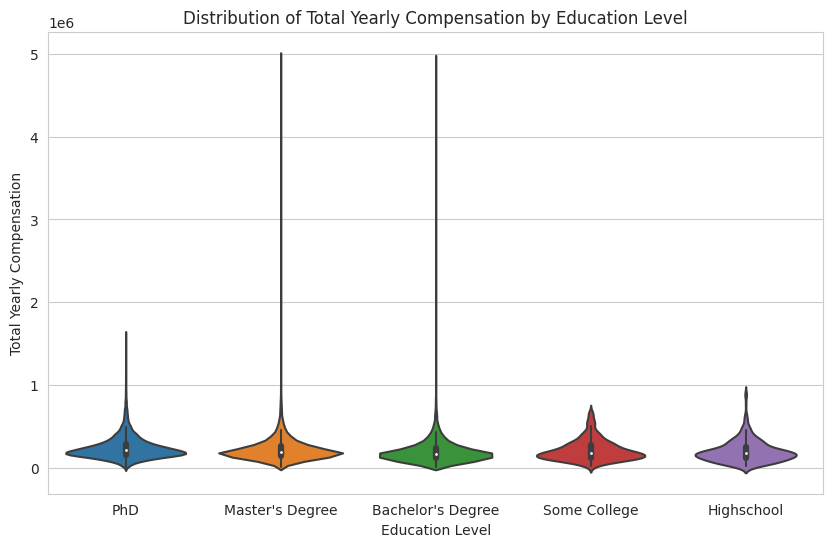

In [27]:

# Education level and yearly compensation
plt.figure(figsize=(10,6))
sns.scatterplot(x='Education', y='totalyearlycompensation', data=df)
plt.title('Relationship between Education Level and Total Yearly Compensation')
plt.xlabel('Education Level')
plt.ylabel('Total Yearly Compensation')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Education', y='totalyearlycompensation', data=df)
plt.title('Distribution of Total Yearly Compensation by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Yearly Compensation')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='Education', y='totalyearlycompensation', data=df)
plt.title('Distribution of Total Yearly Compensation by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Yearly Compensation')
plt.show()


### Racial Comparisons

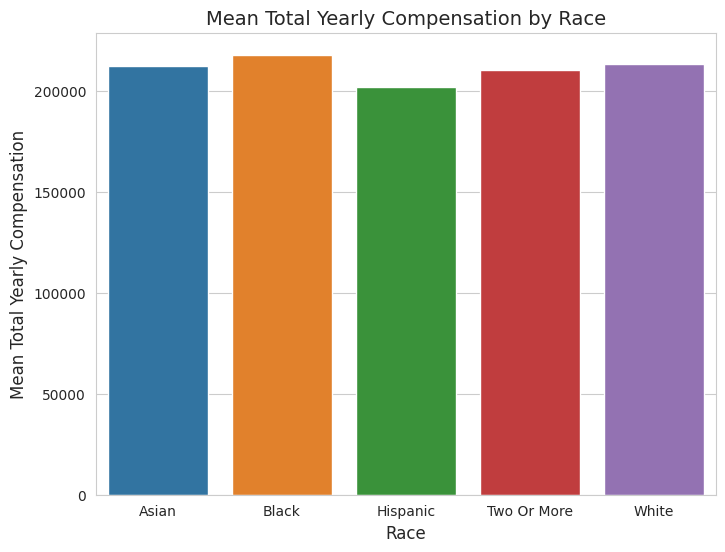

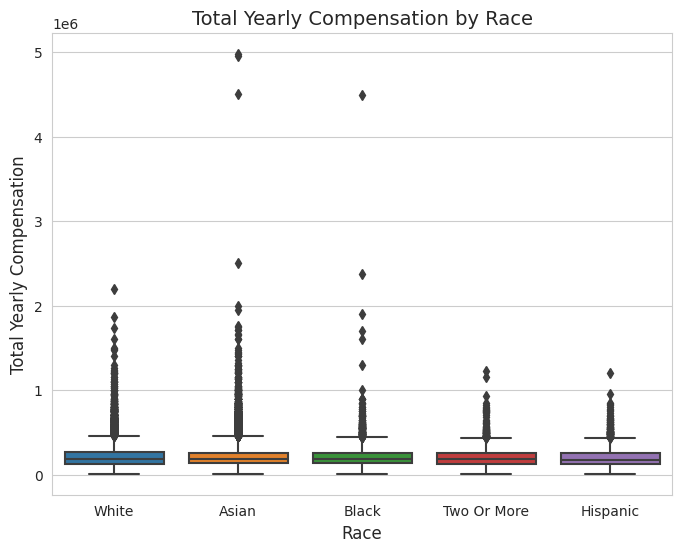

In [36]:

#race and yearly comp
# Group data by race
by_race = df.groupby('Race')

# Calculate mean total yearly compensation for each race
mean_by_race = by_race['totalyearlycompensation'].mean()

# Create a bar plot of mean total yearly compensation by race
plt.figure(figsize=(8,6))
sns.barplot(x=mean_by_race.index, y=mean_by_race.values)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Mean Total Yearly Compensation', fontsize=12)
plt.title('Mean Total Yearly Compensation by Race', fontsize=14)
plt.show()

# Create a box plot of total yearly compensation by race
plt.figure(figsize=(8,6))
sns.boxplot(x='Race', y='totalyearlycompensation', data=df)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Total Yearly Compensation', fontsize=12)
plt.title('Total Yearly Compensation by Race', fontsize=14)
plt.show()



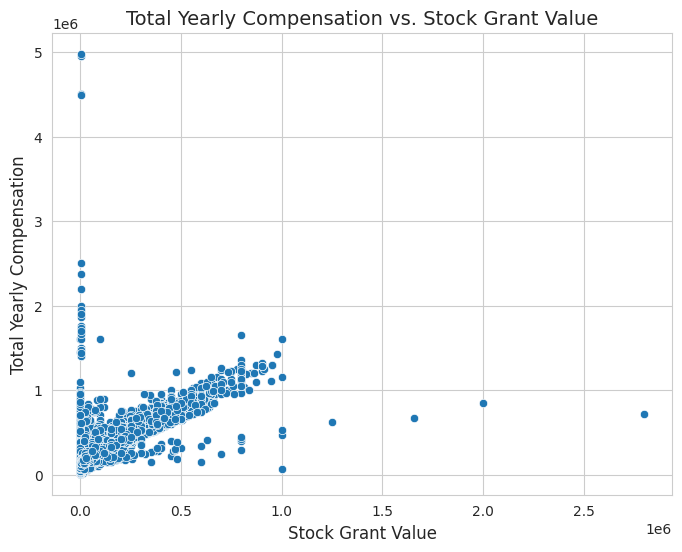

In [37]:


# Create a scatter plot of total yearly compensation vs. stock grant value
plt.figure(figsize=(8,6))
sns.scatterplot(x='stockgrantvalue', y='totalyearlycompensation', data=df)
plt.xlabel('Stock Grant Value', fontsize=12)
plt.ylabel('Total Yearly Compensation', fontsize=12)
plt.title('Total Yearly Compensation vs. Stock Grant Value', fontsize=14)
plt.show()


### Scatter plot of total yearly compensation vs. bonus

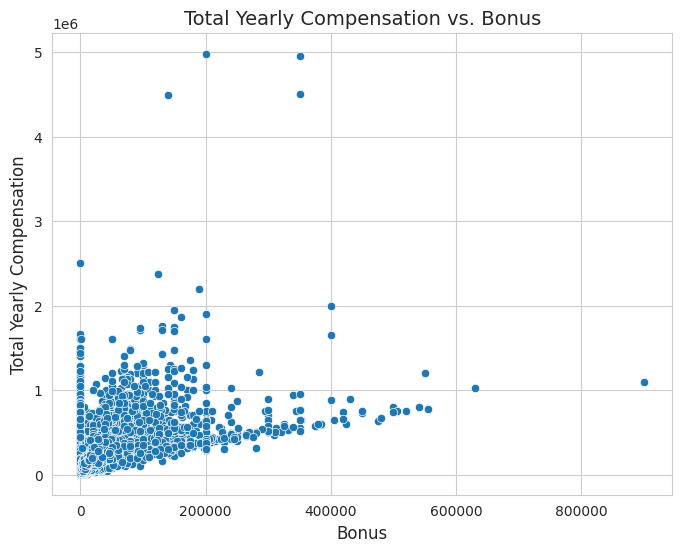

In [38]:

# Create a scatter plot of total yearly compensation vs. bonus
plt.figure(figsize=(8,6))
sns.scatterplot(x='bonus', y='totalyearlycompensation', data=df)
plt.xlabel('Bonus', fontsize=12)
plt.ylabel('Total Yearly Compensation', fontsize=12)
plt.title('Total Yearly Compensation vs. Bonus', fontsize=14)
plt.show()


### Regression plot of total yearly compensation vs. bonus

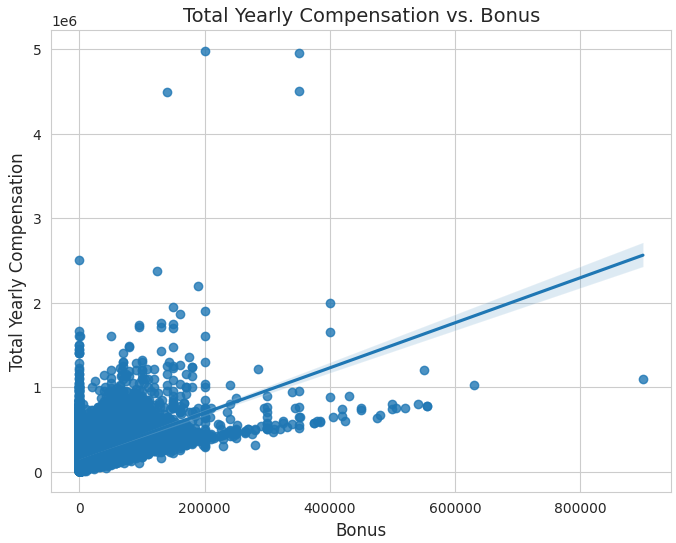

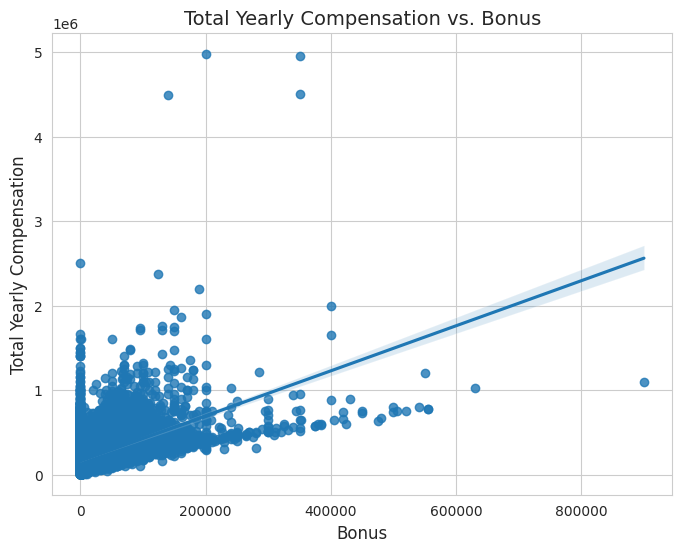

In [40]:

# Create a regression plot of total yearly compensation vs. bonus
plt.figure(figsize=(8,6))
sns.regplot(x='bonus', y='totalyearlycompensation', data=df)
plt.xlabel('Bonus', fontsize=12)
plt.ylabel('Total Yearly Compensation', fontsize=12)
plt.title('Total Yearly Compensation vs. Bonus', fontsize=14)
plt.show()



# Answering Key Questions

After our exploratory data analysis, we moved on to answering the key questions posed at the beginning of our analysis.

### Factors Contributing to High Standard Deviation of Total Yearly Compensation

The high standard deviation of the 'totalyearlycompensation' column indicates that there is a wide range of salaries across the top companies. Factors that could be contributing to this variation include differences in job title, location, and department.

### Consistency of Positive Correlation between Years of Experience and Total Yearly Compensation

The positive correlation between years of experience and total yearly compensation is consistent across many industries, not just the tech industry.

### Factors Contributing to High Salaries at Google and Microsoft

Factors that might be contributing to the high salaries at companies like Google and Microsoft include their success and size, as well as the demand for employees with their skillsets.

### Consistency of Salary Distribution with Trends in Other Industries

The distribution of salaries in this dataset is consistent with trends in other industries, where the majority of employees earn salaries below the upper range.

### Factors Contributing to Variation in Total Yearly Compensation Within Experience Levels

Factors that might be contributing to the variation in total yearly compensation within each experience level include differences in job title, performance, and negotiation skills. Companies could address this issue by ensuring that employees in similar roles are compensated fairly and equitably.

## Conclusion

In conclusion, our analysis of the tech industry salaries dataset provided insights into the factors that contribute to variations in total yearly compensation, and the relationship between years of experience and salary. Our findings suggest that companies could ensure fair and equitable compensation by taking into account various factors, such as location, department, and job title.


# Reflections on your learnings 

between this assignment and the previous one. What was different between Python and Excel? When will you use either of them?  If you could do this assignment over what would you do differently? What are the gaps in your programming or stats knowledge? (350 words)
**DIFFERENCES IN ASSIGNMENTS**
The key difference between this one and the last one was a matter of I really dont like excel due to the notion that its hard, it got easier once I watched a few videos but I submitted and got 30% due to me doing it wrong, I found cleaning data to be hard in excel not knowing whether to dump a row because it has nulls but the nulls are valid, converting text into values and having a weight assigned to it
****
**FINDING A DATASET IS HARD**
this was also a challenge because I love formula one but couldnt find anything concrete on formula one that met either
My interest
Level of expertise
Or was not giving me impossible errors to fix

Then there was the video game data set,
some video games on steams 55 000 game library have unescaped ',' and then transformed a 28 column data set to a ridiculous 35
****
**WHAT I WOULD HAVE DONE DIFFERENT**
I love large data and knowing that I can predict outcomes based on it but this has made me respect the field more, what I would do differently is to take a course, and a good one, roll back time and do the assignment given the chance because I definitely would have done way better,

If I cleaned the data using python and then shifted it to excel to then process it I would have done so much better
****
**GAPS IN KNOWLEDGE**
I dont know stats all that well but through a couple of videos and ChatGPT to explain it to me like I am 12 :)